# F1 Data Analysis

In [1]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.


# MONACO 2024

### Hamilton vs Russell Qualifying Performance

In [2]:
import fastf1

In [3]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
monaco_quali_session = fastf1.get_session(2024, 'Monaco Grand Prix', 'Q')
monaco_quali_session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.32 GB) C:\Users\koner\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
Request for URL https://ergast.com/api/f1/2024/8/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend f

In [8]:
rus_lap = monaco_quali_session.laps.pick_driver('RUS').pick_fastest()
ham_lap = monaco_quali_session.laps.pick_driver('HAM').pick_fastest()

In [10]:
rus_tel = rus_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

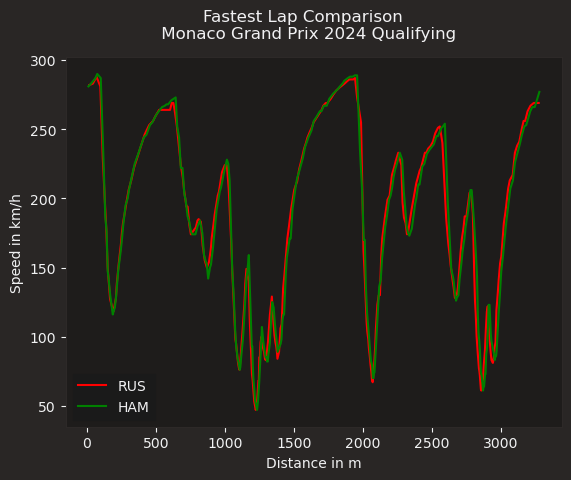

Russell Fastest Lap Sector Times:
Sector 1: 0 days 00:00:18.244000
Sector 2: 0 days 00:00:33.462000
Sector 3: 0 days 00:00:18.837000

Hamilton Fastest Lap Sector Times:
Sector 1: 0 days 00:00:18.372000
Sector 2: 0 days 00:00:33.439000
Sector 3: 0 days 00:00:18.810000


In [11]:
fig, ax = plt.subplots()
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color='red', label='RUS')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color='green', label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{monaco_quali_session.event['EventName']} {session.event.year} Qualifying")

plt.show()

# Print sector times
print(f"Russell Fastest Lap Sector Times:")
print(f"Sector 1: {rus_lap['Sector1Time']}")
print(f"Sector 2: {rus_lap['Sector2Time']}")
print(f"Sector 3: {rus_lap['Sector3Time']}")

print(f"\nHamilton Fastest Lap Sector Times:")
print(f"Sector 1: {ham_lap['Sector1Time']}")
print(f"Sector 2: {ham_lap['Sector2Time']}")
print(f"Sector 3: {ham_lap['Sector3Time']}")

C:\Users\koner\anaconda3\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


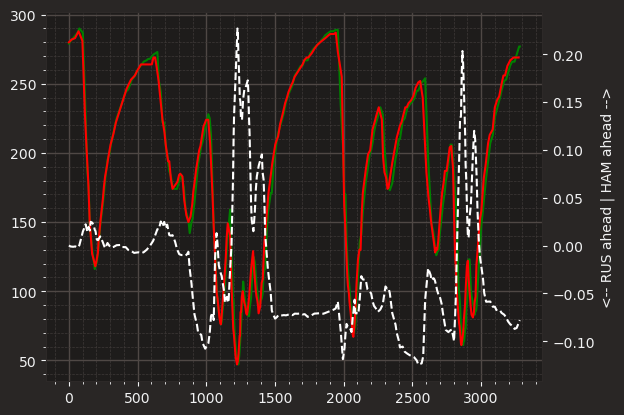

In [12]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

plotting.setup_mpl()


delta_time, ref_tel, compare_tel = utils.delta_time(ham_lap, rus_lap)
# ham is reference, rus is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color='green')
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color='red')

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- RUS ahead | HAM ahead -->")
plt.show()


In [13]:
## Observations:
### Loss of Time in Turn 3 braking  
### Impressive late breaking from Hamilton


------------------------------------------------------------------------------------------------------------

# CANADA 2024

In [14]:
import fastf1
import pandas as pd

session = fastf1.get_session(2024, 'Canada', 'Q')
session.load()
hamilton_canada_laps = session.laps.pick_driver('HAM')
russell_canada_laps = session.laps.pick_driver('RUS')
max_canada_laps = session.laps.pick_driver('VER')
norris_canada_laps = session.laps.pick_driver('NOR')
piastri_canada_laps = session.laps.pick_driver('PIA')
rus_df = pd.DataFrame(russell_canada_laps)
ham_df = pd.DataFrame(hamilton_canada_laps)
max_df = pd.DataFrame(max_canada_laps)
nor_df = pd.DataFrame(norris_canada_laps)
pia_df = pd.DataFrame(piastri_canada_laps)
ham_df.head()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', 

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
24,0 days 00:20:15.440000,HAM,44,NaT,1.0,1.0,0 days 00:18:29.436000,NaT,NaT,0 days 00:00:36.330000,...,True,Mercedes,0 days 00:18:29.436000,2024-06-22 14:05:02.353,1,NaN,False,,False,False
25,0 days 00:21:28.473000,HAM,44,0 days 00:01:13.033000,2.0,1.0,NaT,NaT,0 days 00:00:21.812000,0 days 00:00:29.222000,...,True,Mercedes,0 days 00:20:15.440000,2024-06-22 14:06:48.357,1,NaN,False,,False,True
26,0 days 00:23:14.438000,HAM,44,0 days 00:01:45.965000,3.0,1.0,NaT,0 days 00:23:11.750000,0 days 00:00:30.820000,0 days 00:00:40.839000,...,True,Mercedes,0 days 00:21:28.473000,2024-06-22 14:08:01.390,1,NaN,False,,False,False
27,0 days 00:29:47.121000,HAM,44,NaT,4.0,2.0,0 days 00:27:31.701000,NaT,NaT,0 days 00:00:37.153000,...,True,Mercedes,0 days 00:23:14.438000,2024-06-22 14:09:47.355,1,NaN,False,,False,False
28,0 days 00:30:59.264000,HAM,44,0 days 00:01:12.143000,5.0,2.0,NaT,NaT,0 days 00:00:21.516000,0 days 00:00:28.691000,...,True,Mercedes,0 days 00:29:47.121000,2024-06-22 14:16:20.038,1,NaN,False,,False,True


In [15]:
hamilton_optimal = ham_df['Sector1Time'].min() + ham_df['Sector2Time'].min() + ham_df['Sector3Time'].min()
russell_optimal = rus_df['Sector1Time'].min() + rus_df['Sector2Time'].min() + rus_df['Sector3Time'].min()
max_optimal = max_df['Sector1Time'].min() + max_df['Sector2Time'].min() + max_df['Sector3Time'].min()
norris_optimal = nor_df['Sector1Time'].min() + nor_df['Sector2Time'].min() + nor_df['Sector3Time'].min()
piastri_optimal = pia_df['Sector1Time'].min() + pia_df['Sector2Time'].min() + pia_df['Sector3Time'].min()

print(f"Lewis Hamilton optimal laptime {hamilton_optimal}")
print(f"George Russell optimal laptime {russell_optimal}")
print(f"Max Verstappen optimal laptime {max_optimal}")
print(f"Lando Norris optimal laptime {norris_optimal}")
print(f"Oscar Piastri optimal laptime {piastri_optimal}")


Lewis Hamilton optimal laptime 0 days 00:01:11.658000
George Russell optimal laptime 0 days 00:01:11.623000
Max Verstappen optimal laptime 0 days 00:01:11.403000
Lando Norris optimal laptime 0 days 00:01:11.383000
Oscar Piastri optimal laptime 0 days 00:01:11.947000


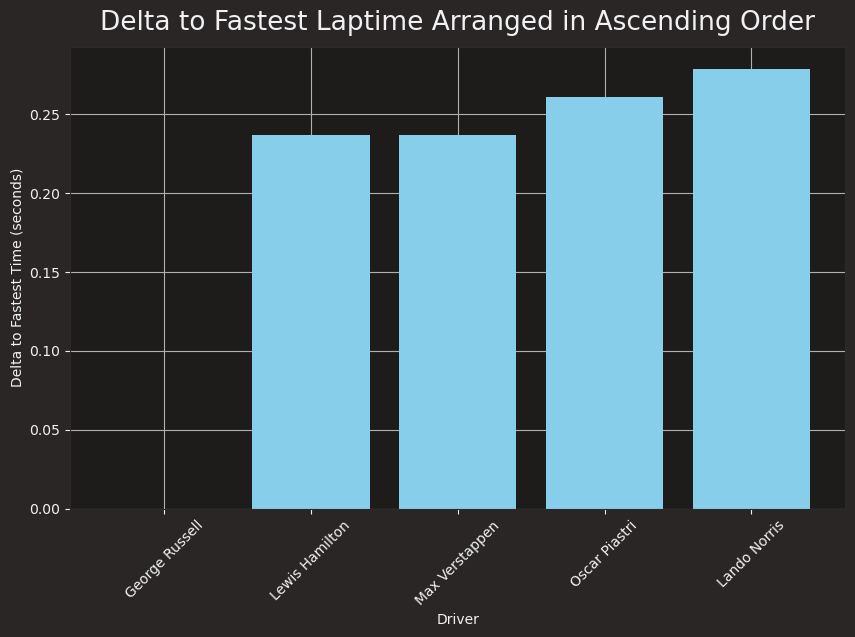

In [16]:
import pandas as pd

drivers = ['Lewis Hamilton', 'George Russell', 'Max Verstappen', 'Lando Norris', 'Oscar Piastri']
times = ['00:01:11.979', '00:01:11.742', '00:01:11.979', '00:01:12.021', '00:01:12.003']

times_td = pd.to_timedelta(times)

df = pd.DataFrame({'Driver': drivers, 'Laptime': times_td})

fastest_time = df['Laptime'].min()
df['Delta'] = df['Laptime'] - fastest_time

df_sorted = df.sort_values(by='Delta')

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Driver'], df_sorted['Delta'].dt.total_seconds(), color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Delta to Fastest Time (seconds)')
plt.title('Delta to Fastest Laptime Arranged in Ascending Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [17]:
rus_df['Sector3Time'].min() - ham_df['Sector3Time'].min() #0.245 seconds russell faster
rus_df['Sector2Time'].min() - ham_df['Sector2Time'].min() #0.072 seconds hamilton faster
rus_df['Sector1Time'].min() - ham_df['Sector1Time'].min() #0.064 seconds rusell faster

Timedelta('-1 days +23:59:59.886000')

In [18]:
## Race Pace Analysis

In [19]:
practice_one = fastf1.get_session(2024, 'Canada', 'FP1')
practice_two = fastf1.get_session(2024, 'Canada', 'FP2')
practice_three = fastf1.get_session(2024, 'Canada', 'FP3')
practice_one.load()
practice_two.load()
practice_three.load()


core           INFO 	Loading data for Canadian Grand Prix - Practice 1 [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
Request for URL https://ergast.com/api/f1/2024/9/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/9/results.json
req            INFO 	No cache

In [22]:
ham_p3_laps = practice_three.laps.pick_driver('HAM')
rus_p3_laps = practice_three.laps.pick_driver('RUS')
max_p3_laps = practice_three.laps.pick_driver('VER')
lec_p3_laps = practice_three.laps.pick_driver('LEC')
sai_p3_laps = practice_three.laps.pick_driver('SAI')
nor_p3_laps = practice_three.laps.pick_driver('NOR')
pia_p3_laps = practice_three.laps.pick_driver('PIA')
alo_p3_laps = practice_three.laps.pick_driver('ALO')

ham_p3_df = pd.DataFrame(ham_p3_laps)
rus_p3_df = pd.DataFrame(rus_p3_laps)
max_p3_df = pd.DataFrame(max_p3_laps)
lec_p3_df = pd.DataFrame(lec_p3_laps)
sai_p3_df = pd.DataFrame(sai_p3_laps)
nor_p3_df = pd.DataFrame(nor_p3_laps)
pia_p3_df = pd.DataFrame(pia_p3_laps)
alo_p3_df = pd.DataFrame(alo_p3_laps)

### HAM LONG RUN FP3

In [23]:
ham_stint_filtered_df = ham_p3_df[ham_p3_df['Stint'] == 2.0]
ham_long_run_filtered = ham_stint_filtered_df[(ham_stint_filtered_df['LapNumber'] != 10.0) & (ham_stint_filtered_df['LapNumber'] != 5.0)]
ham_long_run_filtered['LapTime']


422   0 days 00:01:18.224000
423   0 days 00:01:18.278000
424   0 days 00:01:17.969000
425   0 days 00:01:17.533000
427   0 days 00:01:17.559000
428   0 days 00:01:18.490000
429                      NaT
Name: LapTime, dtype: timedelta64[ns]

In [24]:
ham_longrun_avg = ham_long_run_filtered['LapTime'].mean()
ham_longrun_avg 

Timedelta('0 days 00:01:18.008833333')

### RUS LONG RUN FP3

In [25]:
rus_stint_filtered_df = rus_p3_df[rus_p3_df['Stint'] == 2.0]
rus_long_run_filtered = rus_stint_filtered_df[(rus_stint_filtered_df['LapNumber'] != 8.0) & (rus_stint_filtered_df['LapNumber'] != 5.0) & (rus_stint_filtered_df['LapNumber'] != 9.0)]
rus_long_run_filtered['LapTime']

486   0 days 00:01:18.078000
487   0 days 00:01:17.879000
490   0 days 00:01:17.867000
491   0 days 00:01:17.885000
492   0 days 00:01:17.763000
493                      NaT
Name: LapTime, dtype: timedelta64[ns]

In [26]:
rus_longrun_avg = rus_long_run_filtered['LapTime'].mean()
rus_longrun_avg 

Timedelta('0 days 00:01:17.894400')

### MAX LONG RUN FP3

In [27]:
max_stint_filtered_df = max_p3_df[max_p3_df['Stint'] == 3.0]
max_long_run_filtered = max_stint_filtered_df[(max_stint_filtered_df['LapNumber'] != 11.0) & (max_stint_filtered_df['LapNumber'] != 12.0) & (max_stint_filtered_df['LapNumber'] != 19.0)]
max_long_run_filtered['LapTime']

12   0 days 00:01:18.419000
13   0 days 00:01:17.980000
14   0 days 00:01:17.884000
15   0 days 00:01:17.982000
16   0 days 00:01:17.935000
17   0 days 00:01:18.334000
19   0 days 00:01:18.327000
20                      NaT
Name: LapTime, dtype: timedelta64[ns]

In [28]:
max_longrun_avg = max_long_run_filtered['LapTime'].mean()
max_longrun_avg 

Timedelta('0 days 00:01:18.123000')

### SAI LONG RUN FP3

In [29]:
sai_stint_filtered_df = sai_p3_df[sai_p3_df['Stint'] == 2.0]
sai_long_run_filtered = sai_stint_filtered_df[(sai_stint_filtered_df['LapNumber'] != 8.0) & (sai_stint_filtered_df['LapNumber'] != 5.0) & (sai_stint_filtered_df['LapNumber'] != 11.0) & (sai_stint_filtered_df['LapNumber'] != 12.0)]
sai_long_run_filtered['LapTime']

453   0 days 00:01:17.721000
454   0 days 00:01:17.842000
456   0 days 00:01:17.193000
457   0 days 00:01:17.701000
Name: LapTime, dtype: timedelta64[ns]

In [30]:
sai_longrun_avg = sai_long_run_filtered['LapTime'].mean()
sai_longrun_avg 

Timedelta('0 days 00:01:17.614250')

### LEC LONG RUN FP3

In [31]:
lec_stint_filtered_df = lec_p3_df[lec_p3_df['Stint'] == 2.0]
lec_long_run_filtered = lec_stint_filtered_df[(lec_stint_filtered_df['LapNumber'] != 8.0) & (lec_stint_filtered_df['LapNumber'] != 5.0) & (lec_stint_filtered_df['LapNumber'] != 9.0)]
lec_long_run_filtered['LapTime']

125   0 days 00:01:17.558000
126   0 days 00:01:17.621000
Name: LapTime, dtype: timedelta64[ns]

In [32]:
lec_longrun_avg = lec_long_run_filtered['LapTime'].mean()
lec_longrun_avg 

Timedelta('0 days 00:01:17.589500')

### NOR LONG RUN FP3

In [33]:
# Not Similar Run PLan

### PIA LONG RUN FP3

In [34]:
# Not Similar Run PLan

### ALO LONG RUN FP3

In [35]:
# Not Similar Run PLan

## Combined Visualization of Long Runs

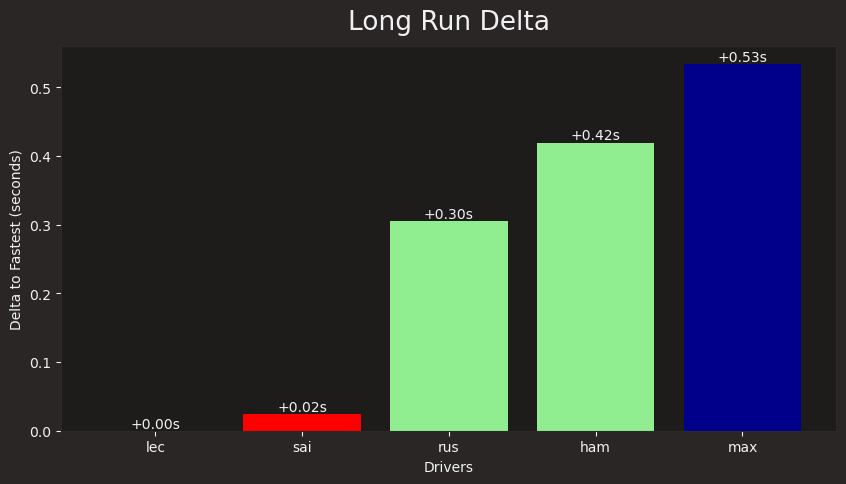

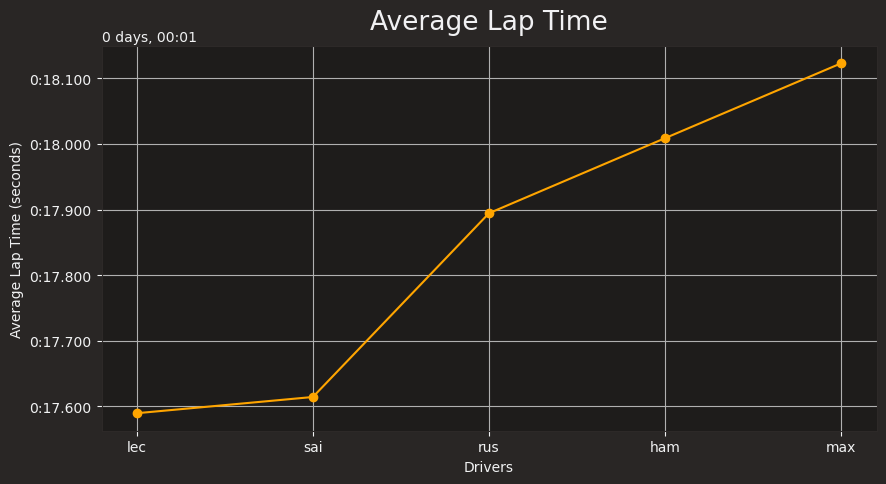

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Average lap times for each driver
lap_times = {
    'ham': ham_longrun_avg,
    'rus': rus_longrun_avg,
    'max': max_longrun_avg,
    'lec': lec_longrun_avg,
    'sai': sai_longrun_avg
}

# Sort lap times in ascending order
sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])

# Extract drivers and lap times
drivers = [driver for driver, _ in sorted_lap_times]
times = [time for _, time in sorted_lap_times]

# Calculate delta to the fastest driver
fastest_time = min(times)
deltas = [float((time-fastest_time).total_seconds()) for time in times]

# Define colors for specific drivers
colors = {
    'ham': 'lightgreen',
    'rus': 'lightgreen',
    'max': 'darkblue',
    'lec': 'red',
    'sai': 'red'
}

# Plotting the bar chart for delta to the fastest driver
plt.figure(figsize=(10, 5))
bars = plt.bar(drivers, deltas, color=[colors[driver] for driver in drivers])

# Labeling the deltas on the bars
for bar, delta in zip(bars, deltas):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'+{delta:.2f}s', ha='center', va='bottom')

plt.xlabel('Drivers')
plt.ylabel('Delta to Fastest (seconds)')
plt.title('Long Run Delta')
plt.show()



# Plotting the line chart for average lap times
plt.figure(figsize=(10, 5))
plt.plot(drivers, times, marker='o', color='orange', linestyle='-')
plt.xlabel('Drivers')
plt.ylabel('Average Lap Time (seconds)')
plt.title('Average Lap Time')
plt.grid(True)
plt.show()


------------------------------------------------------------------------------------------------------------------------

# SPANISH GP 2024

### FP1 Long Run analysis

In [37]:
#Race Runs Analysis

In [38]:
import fastf1
import pandas as pd

spain_fp1_session = fastf1.get_session(2024, 'Spain', 'FP1')
spain_fp1_session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
Request for URL https://ergast.com/api/f1/2024/10/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError

In [39]:
ham_p1_spain_laps = spain_fp1_session.laps.pick_driver('HAM')
rus_p1_spain_laps = spain_fp1_session.laps.pick_driver('RUS')
max_p1_spain_laps = spain_fp1_session.laps.pick_driver('VER')
per_p1_spain_laps = spain_fp1_session.laps.pick_driver('PER')
lec_p1_spain_laps = spain_fp1_session.laps.pick_driver('LEC')
sai_p1_spain_laps = spain_fp1_session.laps.pick_driver('SAI')
nor_p1_spain_laps = spain_fp1_session.laps.pick_driver('NOR')
pia_p1_spain_laps = spain_fp1_session.laps.pick_driver('PIA')

#Converting into DataFrame
ham_spain_p1_df = pd.DataFrame(ham_p1_spain_laps)
rus_spain_p1_df = pd.DataFrame(rus_p1_spain_laps)
max_spain_p1_df = pd.DataFrame(max_p1_spain_laps)
per_spain_p1_df = pd.DataFrame(per_p1_spain_laps)
lec_spain_p1_df = pd.DataFrame(lec_p1_spain_laps)
sai_spain_p1_df = pd.DataFrame(sai_p1_spain_laps)
nor_spain_p1_df = pd.DataFrame(nor_p1_spain_laps)
pia_spain_p1_df = pd.DataFrame(pia_p1_spain_laps)

In [40]:
per_spain_p1_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
48,0 days 00:17:11.676000,PER,11,NaT,1.0,1.0,0 days 00:15:27.892000,NaT,NaT,0 days 00:00:36.416000,...,True,Red Bull Racing,0 days 00:15:27.892000,2024-06-21 11:31:28.338,1,NaN,False,,False,False
49,0 days 00:18:29.066000,PER,11,0 days 00:01:17.390000,2.0,1.0,NaT,NaT,0 days 00:00:22.778000,0 days 00:00:31.156000,...,True,Red Bull Racing,0 days 00:17:11.676000,2024-06-21 11:33:12.122,1,NaN,False,,False,True
50,0 days 00:20:19.275000,PER,11,0 days 00:01:50.209000,3.0,1.0,NaT,0 days 00:20:16.648000,0 days 00:00:28.542000,0 days 00:00:47.952000,...,True,Red Bull Racing,0 days 00:18:29.066000,2024-06-21 11:34:29.512,1,NaN,False,,False,False
51,0 days 00:22:26.003000,PER,11,0 days 00:02:06.728000,4.0,2.0,0 days 00:20:41.337000,NaT,0 days 00:00:49.503000,0 days 00:00:45.437000,...,False,Red Bull Racing,0 days 00:20:19.275000,2024-06-21 11:36:19.721,1,NaN,False,,False,False
52,0 days 00:23:42.458000,PER,11,0 days 00:01:16.455000,5.0,2.0,NaT,NaT,0 days 00:00:22.709000,0 days 00:00:30.848000,...,False,Red Bull Racing,0 days 00:22:26.003000,2024-06-21 11:38:26.449,1,NaN,False,,False,True


In [41]:
# ham outliers in stint 5 - 16, 21, 25, 27,28 (med)
# rus outliers in stint 4 - 18, 20, 23 (hards) & rus outliers in stint 5 - 24, 30, 31 (hards)
# max outliers in stint 5 - 12, ,19, 21 (softs) & max outliers in stint 6 - 22, 26, 27 (hards)
# per outliers in stint 4 - 4, 18, 22, 27, 28 (softs)
# pia outliers in stint 6 - 17, 25 (Med)
# nor outliers in stint 4 - 12, 20, 23 (Hards)
# lec outliers in stint 6 - 18, 23 (Hards)
# sai outliers in stint 5 - 18, 24, 30, 31 (Med)

In [42]:
#Ham Stint 5, FP1
# Filter for stint 5
ham_spain_fp1_stint5 = ham_spain_p1_df[ham_spain_p1_df['Stint'] == 5.0]

# Define laps to exclude
laps_to_exclude = [16.0, 21.0, 25.0, 27.0, 28.0]

# Filter out the specified laps
ham_spain_fp1_stint5_filtered = ham_spain_fp1_stint5[~ham_spain_fp1_stint5['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
ham_spain_fp1_stint5_laptimes = ham_spain_fp1_stint5_filtered['LapTime']
ham_spain_fp1_stint5_laptimes

384   0 days 00:01:20.300000
385   0 days 00:01:19.933000
386   0 days 00:01:20.114000
387   0 days 00:01:20.399000
389   0 days 00:01:20.692000
390   0 days 00:01:21.582000
391   0 days 00:01:21.299000
393   0 days 00:01:20.920000
Name: LapTime, dtype: timedelta64[ns]

In [43]:
#Rus Stint 4,5, FP1
# Define outliers for stints 4 and 5
stint4_outliers = [18.0, 20.0, 23.0]
stint5_outliers = [24.0, 30.0, 31.0]

# Filter for stint 4 and exclude outliers
rus_spain_fp1_stint4 = rus_spain_p1_df[rus_spain_p1_df['Stint'] == 4.0]
rus_spain_fp1_stint4_filtered = rus_spain_fp1_stint4[~rus_spain_fp1_stint4['LapNumber'].isin(stint4_outliers)]
rus_stint4_lap_times = rus_spain_fp1_stint4_filtered['LapTime']

# Filter for stint 5 and exclude outliers
rus_spain_fp1_stint5 = rus_spain_p1_df[rus_spain_p1_df['Stint'] == 5.0]
rus_spain_fp1_stint5_filtered = rus_spain_fp1_stint5[~rus_spain_fp1_stint5['LapNumber'].isin(stint5_outliers)]
rus_stint5_lap_times = rus_spain_fp1_stint5_filtered['LapTime']

# Combine lap times from both stints into one series
rus_spain_fp1_stint4_5_laptimes = pd.concat([rus_stint4_lap_times, rus_stint5_lap_times])
rus_spain_fp1_stint4_5_laptimes

474   0 days 00:01:20.780000
476   0 days 00:01:21.062000
477   0 days 00:01:20.558000
480   0 days 00:01:21.085000
481   0 days 00:01:20.941000
482   0 days 00:01:21.028000
483   0 days 00:01:21.183000
484   0 days 00:01:21.520000
Name: LapTime, dtype: timedelta64[ns]

In [44]:
#Max Stint 5, FP1
# Define outliers for stint 5
stint5_outliers = [12.0, 19.0, 21.0]

# Filter for stint 5 and exclude outliers
max_spain_fp1_stint5 = max_spain_p1_df[max_spain_p1_df['Stint'] == 5.0]
max_spain_fp1_stint5_filtered = max_spain_fp1_stint5[~max_spain_fp1_stint5['LapNumber'].isin(stint5_outliers)]
max_stint5_lap_times = max_spain_fp1_stint5_filtered['LapTime']

# Since only stint 5 is mentioned, we directly use the filtered lap times
max_spain_fp1_stint5_laptimes  = max_stint5_lap_times
max_spain_fp1_stint5_laptimes

12   0 days 00:01:19.932000
13   0 days 00:01:20.124000
14   0 days 00:01:20.139000
15   0 days 00:01:20.265000
16   0 days 00:01:20.407000
17   0 days 00:01:20.697000
19   0 days 00:01:20.961000
Name: LapTime, dtype: timedelta64[ns]

In [45]:
#Max Stint 6, FP1
# Define outliers for stint 6
stint6_outliers = [22.0, 26.0, 27.0]

# Filter for stint 6 and exclude outliers
max_spain_fp1_stint6 = max_spain_p1_df[max_spain_p1_df['Stint'] == 6.0]
max_spain_fp1_stint6_filtered = max_spain_fp1_stint6[~max_spain_fp1_stint6['LapNumber'].isin(stint6_outliers)]
max_stint6_lap_times = max_spain_fp1_stint6_filtered['LapTime']

# Since only stint 6 is mentioned, we directly use the filtered lap times
max_spain_fp1_stint6_laptimes  = max_stint6_lap_times
max_spain_fp1_stint6_laptimes

22   0 days 00:01:19.610000
23   0 days 00:01:19.950000
24   0 days 00:01:20.213000
Name: LapTime, dtype: timedelta64[ns]

In [46]:
#Per Stint 4, FP1
# Define outliers for Perez stint 4
stint4_outliers_per = [4.0, 18.0, 22.0, 27.0, 28.0]

# Filter for Perez stint 4 and exclude outliers
per_spain_fp1_stint4 = per_spain_p1_df[per_spain_p1_df['Stint'] == 4.0]
per_spain_fp1_stint4_filtered = per_spain_fp1_stint4[~per_spain_fp1_stint4['LapNumber'].isin(stint4_outliers_per)]
per_spain_fp1_stint4_laptimes = per_spain_fp1_stint4_filtered['LapTime']
per_spain_fp1_stint4_laptimes

61                      NaT
62   0 days 00:01:20.162000
63   0 days 00:01:20.176000
64   0 days 00:01:20.095000
66   0 days 00:01:20.452000
67   0 days 00:01:20.597000
68   0 days 00:01:21.015000
70   0 days 00:01:21.337000
71   0 days 00:01:21.161000
72   0 days 00:01:21.640000
73   0 days 00:01:21.981000
Name: LapTime, dtype: timedelta64[ns]

In [47]:
#Pia Stint 6, FP1
# Define outliers for Piastri stint 6
stint6_outliers_pia = [17.0, 25.0]

# Filter for Piastri stint 6 and exclude outliers
pia_spain_fp1_stint6 = pia_spain_p1_df[pia_spain_p1_df['Stint'] == 6.0]
pia_spain_fp1_stint6_filtered = pia_spain_fp1_stint6[~pia_spain_fp1_stint6['LapNumber'].isin(stint6_outliers_pia)]
pia_spain_fp1_stint6_laptimes = pia_spain_fp1_stint6_filtered['LapTime']
pia_spain_fp1_stint6_laptimes

528   0 days 00:01:19.249000
529   0 days 00:01:19.516000
530   0 days 00:01:19.805000
531   0 days 00:01:19.815000
532   0 days 00:01:20.189000
533   0 days 00:01:20.402000
534   0 days 00:01:19.459000
Name: LapTime, dtype: timedelta64[ns]

In [48]:
#Nor Stint 4, FP1
# Define outliers for Norris stint 4
stint4_outliers_nor = [12.0, 20.0, 23.0]

# Filter for Norris stint 4 and exclude outliers
nor_spain_fp1_stint4 = nor_spain_p1_df[nor_spain_p1_df['Stint'] == 4.0]
nor_spain_fp1_stint4_filtered = nor_spain_fp1_stint4[~nor_spain_fp1_stint4['LapNumber'].isin(stint4_outliers_nor)]
nor_spain_fp1_stint4_laptimes = nor_spain_fp1_stint4_filtered['LapTime']
nor_spain_fp1_stint4_laptimes

353   0 days 00:01:19.301000
354   0 days 00:01:18.739000
355   0 days 00:01:18.565000
356   0 days 00:01:18.401000
357   0 days 00:01:18.357000
358   0 days 00:01:18.401000
359   0 days 00:01:18.832000
361   0 days 00:01:19.066000
362   0 days 00:01:19.520000
Name: LapTime, dtype: timedelta64[ns]

In [49]:
#Lec Stint 6, FP1
# Define outliers for Leclerc stint 6
stint6_outliers_lec = [18.0, 23.0]

# Filter for Leclerc stint 6 and exclude outliers
lec_spain_fp1_stint6 = lec_spain_p1_df[lec_spain_p1_df['Stint'] == 6.0]
lec_spain_fp1_stint6_filtered = lec_spain_fp1_stint6[~lec_spain_fp1_stint6['LapNumber'].isin(stint6_outliers_lec)]
lec_spain_fp1_stint6_laptimes = lec_spain_fp1_stint6_filtered['LapTime']
lec_spain_fp1_stint6_laptimes

120   0 days 00:01:20.282000
121   0 days 00:01:19.874000
122   0 days 00:01:20.258000
123   0 days 00:01:20.320000
Name: LapTime, dtype: timedelta64[ns]

In [50]:
#Sai Stint 5, FP1
# Define outliers for Sainz stint 5
stint5_outliers_sai = [18.0, 24.0, 30.0, 31.0]

# Filter for Sainz stint 5 and exclude outliers
sai_spain_fp1_stint5 = sai_spain_p1_df[sai_spain_p1_df['Stint'] == 5.0]
sai_spain_fp1_stint5_filtered = sai_spain_fp1_stint5[~sai_spain_fp1_stint5['LapNumber'].isin(stint5_outliers_sai)]
sai_spain_fp1_stint5_laptimes = sai_spain_fp1_stint5_filtered['LapTime']
sai_spain_fp1_stint5_laptimes

443   0 days 00:01:18.816000
444   0 days 00:01:19.391000
445   0 days 00:01:19.744000
446   0 days 00:01:19.669000
447   0 days 00:01:19.812000
449   0 days 00:01:19.954000
450   0 days 00:01:20.404000
451   0 days 00:01:20.385000
452   0 days 00:01:20.577000
453   0 days 00:01:20.873000
Name: LapTime, dtype: timedelta64[ns]

In [53]:
ham_spain_fp1_longrun_avg = ham_spain_fp1_stint5_laptimes.mean()
rus_spain_fp1_longrun_avg = rus_spain_fp1_stint4_5_laptimes.mean()
max_spain_fp1_softs_longrun_avg = max_spain_fp1_stint5_laptimes.mean()
max_spain_fp1_hards_longrun_avg = max_spain_fp1_stint6_laptimes.mean()
per_spain_fp1_longrun_avg = per_spain_fp1_stint4_laptimes.mean()
nor_spain_fp1_longrun_avg = nor_spain_fp1_stint4_laptimes.mean()
pia_spain_fp1_longrun_avg = pia_spain_fp1_stint6_laptimes.mean()
lec_spain_fp1_longrun_avg = lec_spain_fp1_stint6_laptimes.mean()
sai_spain_fp1_longrun_avg = sai_spain_fp1_stint5_laptimes.mean()

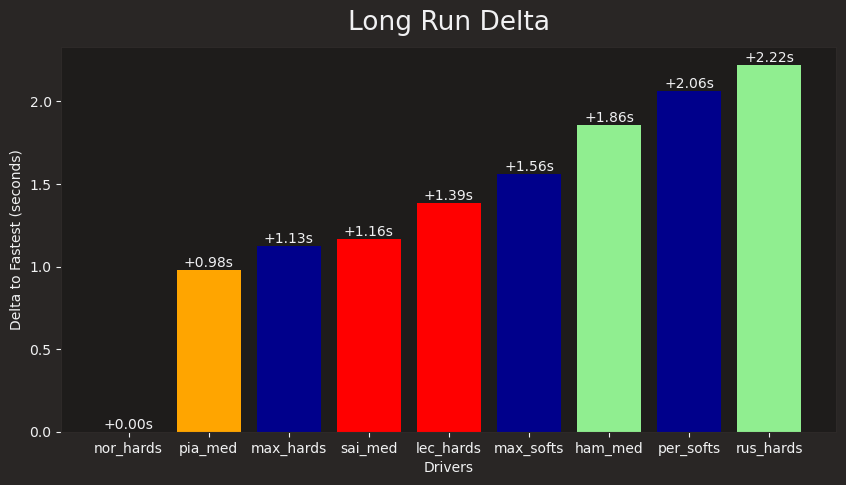

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Average lap times for each driver
lap_times = {
    'ham_med': ham_spain_fp1_longrun_avg,
    'rus_hards': rus_spain_fp1_longrun_avg,
    'max_softs': max_spain_fp1_softs_longrun_avg,
    'max_hards': max_spain_fp1_hards_longrun_avg,
    'per_softs': per_spain_fp1_longrun_avg,
    'nor_hards': nor_spain_fp1_longrun_avg,
    'pia_med': pia_spain_fp1_longrun_avg,
    'lec_hards': lec_spain_fp1_longrun_avg,
    'sai_med': sai_spain_fp1_longrun_avg
}
times = [ham_spain_fp1_longrun_avg, rus_spain_fp1_longrun_avg, max_spain_fp1_softs_longrun_avg, max_spain_fp1_hards_longrun_avg, per_spain_fp1_longrun_avg, nor_spain_fp1_longrun_avg, pia_spain_fp1_longrun_avg, lec_spain_fp1_longrun_avg, sai_spain_fp1_longrun_avg]
# Sort lap times in ascending order
sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])

# Extract drivers and lap times
drivers = [driver for driver, _ in sorted_lap_times]
times = [time for _, time in sorted_lap_times]

# Calculate delta to the fastest driver
fastest_time = min(times)
deltas = [float((time-fastest_time).total_seconds()) for time in times]

# Define colors for specific drivers
colors = {
    'ham_med': 'lightgreen',
    'rus_hards': 'lightgreen',
    'max_softs': 'darkblue',
    'max_hards': 'darkblue',
    'per_softs': 'darkblue',
    'nor_hards': 'orange',
    'pia_med': 'orange',
    'lec_hards': 'red',
    'sai_med': 'red'
}

# Plotting the bar chart for delta to the fastest driver
plt.figure(figsize=(10, 5))
bars = plt.bar(drivers, deltas, color=[colors[driver] for driver in drivers])

# Labeling the deltas on the bars
for bar, delta in zip(bars, deltas):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'+{delta:.2f}s', ha='center', va='bottom')

plt.xlabel('Drivers')
plt.ylabel('Delta to Fastest (seconds)')
plt.title('Long Run Delta')
plt.show()

In [56]:
# Assuming the average lap times are already calculated and assigned to the variables
print(f"Hamilton Spain FP1 Mediums Long Run Average: {ham_spain_fp1_longrun_avg}")
print(f"Russell Spain FP1 Hards Long Run Average: {rus_spain_fp1_longrun_avg}")
print(f"Verstappen Spain FP1 Softs Long Run Average: {max_spain_fp1_softs_longrun_avg}")
print(f"Verstappen Spain FP1 Hards Long Run Average: {max_spain_fp1_hards_longrun_avg}")
print(f"Perez Spain FP1 Softs Long Run Average: {per_spain_fp1_longrun_avg}")
print(f"Norris Spain FP1 Hards Long Run Average: {nor_spain_fp1_longrun_avg}")
print(f"Piastri Spain FP1 Mediums Long Run Average: {pia_spain_fp1_longrun_avg}")
print(f"Leclerc Spain FP1 Hards Long Run Average: {lec_spain_fp1_longrun_avg}")
print(f"Sainz Spain FP1 Mediums Long Run Average: {sai_spain_fp1_longrun_avg}")

Hamilton Spain FP1 Mediums Long Run Average: 0 days 00:01:20.654875
Russell Spain FP1 Hards Long Run Average: 0 days 00:01:21.019625
Verstappen Spain FP1 Softs Long Run Average: 0 days 00:01:20.360714285
Verstappen Spain FP1 Hards Long Run Average: 0 days 00:01:19.924333333
Perez Spain FP1 Softs Long Run Average: 0 days 00:01:20.861600
Norris Spain FP1 Hards Long Run Average: 0 days 00:01:18.798000
Piastri Spain FP1 Mediums Long Run Average: 0 days 00:01:19.776428571
Leclerc Spain FP1 Hards Long Run Average: 0 days 00:01:20.183500
Sainz Spain FP1 Mediums Long Run Average: 0 days 00:01:19.962500


### FP2 Fastest ideal Laptime computation

In [57]:
import fastf1
import pandas as pd

spain_fp2_session = fastf1.get_session(2024, 'Spain', 'FP2')
spain_fp2_session.load()

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
Request for URL https://ergast.com/api/f1/2024/10/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/10/results.json
req            INFO 	No cach

In [59]:
ham_p2_spain_laps = spain_fp2_session.laps.pick_driver('HAM')
rus_p2_spain_laps = spain_fp2_session.laps.pick_driver('RUS')
ver_p2_spain_laps = spain_fp2_session.laps.pick_driver('VER')
per_p2_spain_laps = spain_fp2_session.laps.pick_driver('PER')
lec_p2_spain_laps = spain_fp2_session.laps.pick_driver('LEC')
sai_p2_spain_laps = spain_fp2_session.laps.pick_driver('SAI')
nor_p2_spain_laps = spain_fp2_session.laps.pick_driver('NOR')
pia_p2_spain_laps = spain_fp2_session.laps.pick_driver('PIA')

#Converting into DataFrame
ham_spain_p2_df = pd.DataFrame(ham_p2_spain_laps)
rus_spain_p2_df = pd.DataFrame(rus_p2_spain_laps)
ver_spain_p2_df = pd.DataFrame(ver_p2_spain_laps)
per_spain_p2_df = pd.DataFrame(per_p2_spain_laps)
lec_spain_p2_df = pd.DataFrame(lec_p2_spain_laps)
sai_spain_p2_df = pd.DataFrame(sai_p2_spain_laps)
nor_spain_p2_df = pd.DataFrame(nor_p2_spain_laps)
pia_spain_p2_df = pd.DataFrame(pia_p2_spain_laps)

In [60]:
ham_spain_fp2_ideal_lap = ham_spain_p2_df['Sector1Time'].min() + ham_spain_p2_df['Sector2Time'].min() + ham_spain_p2_df['Sector3Time'].min()
rus_spain_fp2_ideal_lap = rus_spain_p2_df['Sector1Time'].min() + rus_spain_p2_df['Sector2Time'].min() + rus_spain_p2_df['Sector3Time'].min()
ver_spain_fp2_ideal_lap = ver_spain_p2_df['Sector1Time'].min() + ver_spain_p2_df['Sector2Time'].min() + ver_spain_p2_df['Sector3Time'].min()
per_spain_fp2_ideal_lap = per_spain_p2_df['Sector1Time'].min() + per_spain_p2_df['Sector2Time'].min() + per_spain_p2_df['Sector3Time'].min()
nor_spain_fp2_ideal_lap = nor_spain_p2_df['Sector1Time'].min() + nor_spain_p2_df['Sector2Time'].min() + nor_spain_p2_df['Sector3Time'].min()
pia_spain_fp2_ideal_lap = pia_spain_p2_df['Sector1Time'].min() + pia_spain_p2_df['Sector2Time'].min() + pia_spain_p2_df['Sector3Time'].min()
lec_spain_fp2_ideal_lap = lec_spain_p2_df['Sector1Time'].min() + lec_spain_p2_df['Sector2Time'].min() + lec_spain_p2_df['Sector3Time'].min()
sai_spain_fp2_ideal_lap = sai_spain_p2_df['Sector1Time'].min() + sai_spain_p2_df['Sector2Time'].min() + sai_spain_p2_df['Sector3Time'].min()

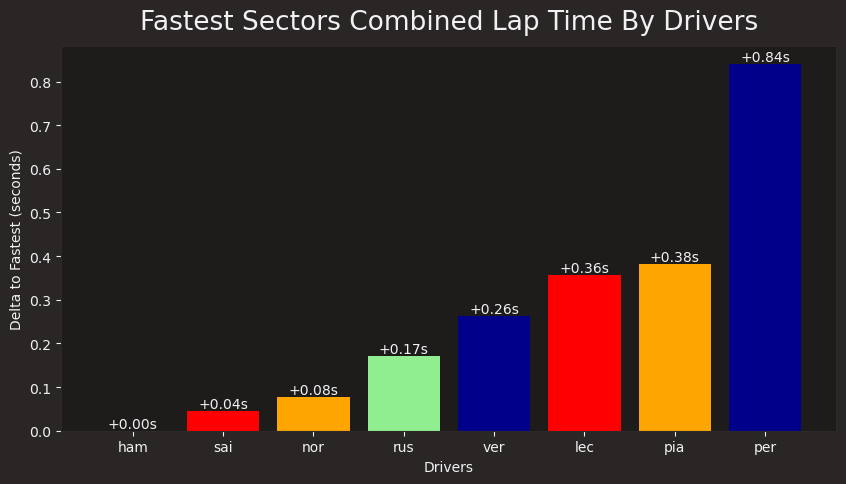

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Average lap times for each driver
lap_times = {
    'ham': ham_spain_fp2_ideal_lap,
    'rus': rus_spain_fp2_ideal_lap,
    'ver': ver_spain_fp2_ideal_lap,
    'per': per_spain_fp2_ideal_lap,
    'nor': nor_spain_fp2_ideal_lap,
    'pia': pia_spain_fp2_ideal_lap,
    'lec': lec_spain_fp2_ideal_lap,
    'sai': sai_spain_fp2_ideal_lap
}
times = [ham_spain_fp2_ideal_lap, rus_spain_fp2_ideal_lap, ver_spain_fp2_ideal_lap, per_spain_fp2_ideal_lap, nor_spain_fp2_ideal_lap, pia_spain_fp2_ideal_lap, lec_spain_fp2_ideal_lap, sai_spain_fp2_ideal_lap]
# Sort lap times in ascending order
sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])

# Extract drivers and lap times
drivers = [driver for driver, _ in sorted_lap_times]
times = [time for _, time in sorted_lap_times]

# Calculate delta to the fastest driver
fastest_time = min(times)
deltas = [float((time-fastest_time).total_seconds()) for time in times]

# Define colors for specific drivers
colors = {
    'ham': 'lightgreen',
    'rus': 'lightgreen',
    'ver': 'darkblue',
    'max': 'darkblue',
    'per': 'darkblue',
    'nor': 'orange',
    'pia': 'orange',
    'lec': 'red',
    'sai': 'red'
}

# Plotting the bar chart for delta to the fastest driver
plt.figure(figsize=(10, 5))
bars = plt.bar(drivers, deltas, color=[colors[driver] for driver in drivers])

# Labeling the deltas on the bars
for bar, delta in zip(bars, deltas):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'+{delta:.2f}s', ha='center', va='bottom')

plt.xlabel('Drivers')
plt.ylabel('Delta to Fastest (seconds)')
plt.title('Fastest Sectors Combined Lap Time By Drivers')
plt.show()

In [63]:
# Assuming the average lap times are already calculated and assigned to the variables
print(f"Hamilton Spain FP2 Fastest Ideal Laptime: {ham_spain_fp2_ideal_lap}")
print(f"Russell Spain FP2 Fastest Ideal Laptime: {rus_spain_fp2_ideal_lap}")
print(f"Verstappen Spain FP2 Fastest Ideal Laptime: {ver_spain_fp2_ideal_lap}")
print(f"Perez Spain FP2 Fastest Ideal Laptime: {per_spain_fp2_ideal_lap}")
print(f"Norris Spain FP2 Fastest Ideal Laptime: {nor_spain_fp2_ideal_lap}")
print(f"Piastri Spain FP2 Fastest Ideal Laptime: {pia_spain_fp2_ideal_lap}")
print(f"Leclerc Spain FP2 Fastest Ideal Laptime: {lec_spain_fp2_ideal_lap}")
print(f"Sainz Spain FP2 Fastest Ideal Laptime: {sai_spain_fp2_ideal_lap}")

Hamilton Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.241000
Russell Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.413000
Verstappen Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.504000
Perez Spain FP2 Fastest Ideal Laptime: 0 days 00:01:14.081000
Norris Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.319000
Piastri Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.622000
Leclerc Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.597000
Sainz Spain FP2 Fastest Ideal Laptime: 0 days 00:01:13.286000


### FP2 Long Run Analysis

In [64]:
lec_p2_spain_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
107,0 days 00:17:29.871000,LEC,16,NaT,1.0,1.0,0 days 00:15:17.913000,NaT,NaT,0 days 00:00:38.512000,...,True,Ferrari,0 days 00:15:17.913000,2024-06-21 15:01:06.100,1,NaN,False,,False,False
108,0 days 00:19:12.072000,LEC,16,0 days 00:01:42.201000,2.0,1.0,NaT,NaT,0 days 00:00:29.261000,0 days 00:00:41.907000,...,True,Ferrari,0 days 00:17:29.871000,2024-06-21 15:03:18.058,1,NaN,False,,False,True
109,0 days 00:20:26.893000,LEC,16,0 days 00:01:14.821000,3.0,1.0,NaT,NaT,0 days 00:00:22.217000,0 days 00:00:29.891000,...,True,Ferrari,0 days 00:19:12.072000,2024-06-21 15:05:00.259,1,NaN,False,,False,True
110,0 days 00:22:32.309000,LEC,16,0 days 00:02:05.416000,4.0,1.0,NaT,NaT,0 days 00:00:34.906000,0 days 00:00:57.472000,...,True,Ferrari,0 days 00:20:26.893000,2024-06-21 15:06:15.080,1,NaN,False,,False,True
111,0 days 00:24:00.581000,LEC,16,0 days 00:01:28.272000,5.0,1.0,NaT,0 days 00:23:56.780000,0 days 00:00:22.101000,0 days 00:00:29.999000,...,True,Ferrari,0 days 00:22:32.309000,2024-06-21 15:08:20.496,1,NaN,False,,False,False
112,0 days 00:26:42.618000,LEC,16,NaT,6.0,2.0,0 days 00:24:25.993000,NaT,0 days 00:01:13.523000,0 days 00:00:58.808000,...,False,Ferrari,0 days 00:24:00.581000,2024-06-21 15:09:48.768,1,NaN,False,,False,False
113,0 days 00:28:05.537000,LEC,16,0 days 00:01:22.919000,7.0,2.0,NaT,0 days 00:28:02.681000,0 days 00:00:21.982000,0 days 00:00:30.294000,...,False,Ferrari,0 days 00:26:42.618000,2024-06-21 15:12:30.805,1,NaN,False,,False,False
114,0 days 00:38:18.413000,LEC,16,NaT,8.0,3.0,0 days 00:36:23.587000,NaT,NaT,0 days 00:00:43.651000,...,True,Ferrari,0 days 00:28:05.537000,2024-06-21 15:13:53.724,1,NaN,False,,False,False
115,0 days 00:39:32.010000,LEC,16,0 days 00:01:13.597000,9.0,3.0,NaT,NaT,0 days 00:00:21.768000,0 days 00:00:29.412000,...,True,Ferrari,0 days 00:38:18.413000,2024-06-21 15:24:06.600,1,NaN,False,,False,True
116,0 days 00:41:33.102000,LEC,16,0 days 00:02:01.092000,10.0,3.0,NaT,0 days 00:41:30.291000,0 days 00:00:32.783000,0 days 00:00:48.973000,...,True,Ferrari,0 days 00:39:32.010000,2024-06-21 15:25:20.197,1,NaN,False,,False,False


In [65]:
# ham outliers in stint 6 - 15, 22, 23 (softs)
# rus outliers in stint 4 - 16, 21, 22, 23 (softs)
# max outliers in stint 4 - 10 (mediums)
# per outliers in stint 5 - 12, 18, 17 (mediums)
# nor outliers in stint 3 - 11, 20 (softs) & nor outliers in stint 4 - 21, 26, 25 (meds)
# pia outliers in stint 5 - 18, 22, 23 (softs)
# lec outliers in stint 4 - 11, 12, 13, 14, 18, 19 (softs)
# sai outliers in stint 4 - 10, 18, 19, 20, 24 (softs)

In [66]:
#Ham Stint 6, FP2
# Filter for stint 6
ham_spain_fp2_stint6 = ham_spain_p2_df[ham_spain_p2_df['Stint'] == 6.0]

# Define laps to exclude
laps_to_exclude = [15.0, 22.0, 23.0]

# Filter out the specified laps
ham_spain_fp2_stint6_filtered = ham_spain_fp2_stint6[~ham_spain_fp2_stint6['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
ham_spain_fp2_stint6_laptimes = ham_spain_fp2_stint6_filtered['LapTime']
ham_spain_fp2_stint6_laptimes

442   0 days 00:01:20.514000
443   0 days 00:01:19.835000
444   0 days 00:01:20.081000
445   0 days 00:01:20.020000
446   0 days 00:01:19.941000
447   0 days 00:01:23.979000
450   0 days 00:01:20.345000
451   0 days 00:01:20.803000
452   0 days 00:01:20.339000
453   0 days 00:02:15.987000
454   0 days 00:02:29.062000
Name: LapTime, dtype: timedelta64[ns]

In [67]:
#Rus Stint 4, FP2
# Filter for stint 4
rus_spain_fp2_stint4 = rus_spain_p2_df[rus_spain_p2_df['Stint'] == 4.0]

# Define laps to exclude
laps_to_exclude = [16.0, 21.0, 22.0, 23.0]

# Filter out the specified laps
rus_spain_fp2_stint4_filtered = rus_spain_fp2_stint4[~rus_spain_fp2_stint4['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
rus_spain_fp2_stint4_laptimes = rus_spain_fp2_stint4_filtered['LapTime']
rus_spain_fp2_stint4_laptimes

501   0 days 00:01:19.994000
502   0 days 00:01:19.813000
503   0 days 00:01:19.879000
504   0 days 00:01:24.107000
Name: LapTime, dtype: timedelta64[ns]

In [68]:
#Ver Stint 4, FP2
# Filter for stint 4
ver_spain_fp2_stint4 = ver_spain_p2_df[ver_spain_p2_df['Stint'] == 4.0]

# Define laps to exclude
laps_to_exclude = [10.0]

# Filter out the specified laps
ver_spain_fp2_stint4_filtered = ver_spain_fp2_stint4[~ver_spain_fp2_stint4['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
ver_spain_fp2_stint4_laptimes = ver_spain_fp2_stint4_filtered['LapTime']
ver_spain_fp2_stint4_laptimes

10   0 days 00:01:19.434000
11   0 days 00:01:19.421000
12   0 days 00:01:19.719000
13   0 days 00:01:19.511000
14   0 days 00:01:19.614000
15   0 days 00:01:20.102000
16   0 days 00:01:20.233000
17   0 days 00:01:25.010000
18   0 days 00:01:21.700000
19   0 days 00:01:20.311000
20   0 days 00:01:26.142000
Name: LapTime, dtype: timedelta64[ns]

In [69]:
#Per Stint 5, FP2
# Filter for stint 5
per_spain_fp2_stint5 = per_spain_p2_df[per_spain_p2_df['Stint'] == 5.0]

# Define laps to exclude
laps_to_exclude = [12.0, 17.0, 18.0]

# Filter out the specified laps
per_spain_fp2_stint5_filtered = per_spain_fp2_stint5[~per_spain_fp2_stint5['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
per_spain_fp2_stint5_laptimes = per_spain_fp2_stint5_filtered['LapTime']
per_spain_fp2_stint5_laptimes

68   0 days 00:01:19.959000
69   0 days 00:01:19.951000
70   0 days 00:01:20.168000
71   0 days 00:01:24.319000
74   0 days 00:01:21.608000
75   0 days 00:01:21.046000
76   0 days 00:01:21.244000
77   0 days 00:02:14.162000
78   0 days 00:02:10.019000
Name: LapTime, dtype: timedelta64[ns]

In [70]:
#Nor Stint 4 Mediums, FP2
# Filter for stint 4
nor_spain_fp2_stint4 = nor_spain_p2_df[nor_spain_p2_df['Stint'] == 4.0]

# Define laps to exclude
laps_to_exclude = [21.0, 26.0, 25.0]

# Filter out the specified laps
nor_spain_fp2_stint4_filtered = nor_spain_fp2_stint4[~nor_spain_fp2_stint4['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
nor_spain_fp2_stint4_laptimes = nor_spain_fp2_stint4_filtered['LapTime']
nor_spain_fp2_stint4_laptimes

422   0 days 00:01:18.898000
423   0 days 00:01:18.562000
424   0 days 00:01:19.630000
425   0 days 00:01:45.394000
426   0 days 00:02:09.215000
Name: LapTime, dtype: timedelta64[ns]

In [71]:
#Nor Stint 3 Softs, FP2
# Filter for stint 3
nor_spain_fp2_stint3 = nor_spain_p2_df[nor_spain_p2_df['Stint'] == 3.0]

# Define laps to exclude
laps_to_exclude = [11.0, 20.0]

# Filter out the specified laps
nor_spain_fp2_stint3_filtered = nor_spain_fp2_stint3[~nor_spain_fp2_stint3['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
nor_spain_fp2_stint3_laptimes = nor_spain_fp2_stint3_filtered['LapTime']
nor_spain_fp2_stint3_laptimes

407   0 days 00:01:20.153000
408   0 days 00:01:20.442000
409   0 days 00:01:20.171000
410   0 days 00:01:20.060000
411   0 days 00:01:19.875000
412   0 days 00:01:20.245000
413   0 days 00:01:20.174000
414   0 days 00:01:20.160000
416   0 days 00:01:19.773000
417   0 days 00:01:20.037000
418   0 days 00:01:20.270000
419   0 days 00:01:20.248000
420   0 days 00:01:26.620000
Name: LapTime, dtype: timedelta64[ns]

In [72]:
#Pia Stint 5, FP2
# Filter for stint 5
pia_spain_fp2_stint5 = pia_spain_p2_df[pia_spain_p2_df['Stint'] == 5.0]

# Define laps to exclude
laps_to_exclude = [18.0, 22.0, 23.0]

# Filter out the specified laps
pia_spain_fp2_stint5_filtered = pia_spain_fp2_stint5[~pia_spain_fp2_stint5['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
pia_spain_fp2_stint5_laptimes = pia_spain_fp2_stint5_filtered['LapTime']
pia_spain_fp2_stint5_laptimes

566   0 days 00:01:19.177000
567   0 days 00:01:20.558000
568   0 days 00:01:19.462000
569   0 days 00:01:59.900000
570   0 days 00:02:06.441000
Name: LapTime, dtype: timedelta64[ns]

In [73]:
#lec Stint 4, FP2
# Filter for stint 4
lec_spain_fp2_stint4 = lec_spain_p2_df[lec_spain_p2_df['Stint'] == 4.0]

# Define laps to exclude
laps_to_exclude = [11, 12, 13, 14, 18, 19]

# Filter out the specified laps
lec_spain_fp2_stint4_filtered = lec_spain_fp2_stint4[~lec_spain_fp2_stint4['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
lec_spain_fp2_stint4_laptimes = lec_spain_fp2_stint4_filtered['LapTime']
lec_spain_fp2_stint4_laptimes

Series([], Name: LapTime, dtype: timedelta64[ns])

In [74]:
#Sai Stint 4, FP2
# Filter for stint 4
sai_spain_fp2_stint4 = sai_spain_p2_df[sai_spain_p2_df['Stint'] == 4.0]

# Define laps to exclude
laps_to_exclude = [10, 18, 19, 20, 24, 23]

# Filter out the specified laps
sai_spain_fp2_stint4_filtered = sai_spain_fp2_stint4[~sai_spain_fp2_stint4['LapNumber'].isin(laps_to_exclude)]

# Select 'LapTime' column
sai_spain_fp2_stint4_laptimes = sai_spain_fp2_stint4_filtered['LapTime']
sai_spain_fp2_stint4_laptimes

465   0 days 00:01:19.918000
466   0 days 00:01:20.276000
467   0 days 00:01:19.801000
468   0 days 00:01:19.944000
469   0 days 00:01:19.851000
470   0 days 00:01:20.171000
471   0 days 00:01:20.490000
475   0 days 00:01:20.940000
476   0 days 00:01:21.081000
Name: LapTime, dtype: timedelta64[ns]

In [75]:
ham_spain_fp2_longrun_avg = ham_spain_fp2_stint6_laptimes.mean()
rus_spain_fp2_longrun_avg = rus_spain_fp2_stint4_laptimes.mean()
ver_spain_fp2_longrun_avg = ver_spain_fp2_stint4_laptimes.mean()
per_spain_fp2_longrun_avg = per_spain_fp2_stint5_laptimes.mean()
nor_spain_fp2_medium_longrun_avg = nor_spain_fp2_stint4_laptimes.mean()
nor_spain_fp2_softs_longrun_avg = nor_spain_fp2_stint3_laptimes.mean()
pia_spain_fp2_longrun_avg = pia_spain_fp2_stint5_laptimes.mean()
lec_spain_fp2_longrun_avg = lec_spain_fp2_stint4_laptimes.mean()
sai_spain_fp2_longrun_avg = sai_spain_fp2_stint4_laptimes.mean()

posx and posy should be finite values
posx and posy should be finite values


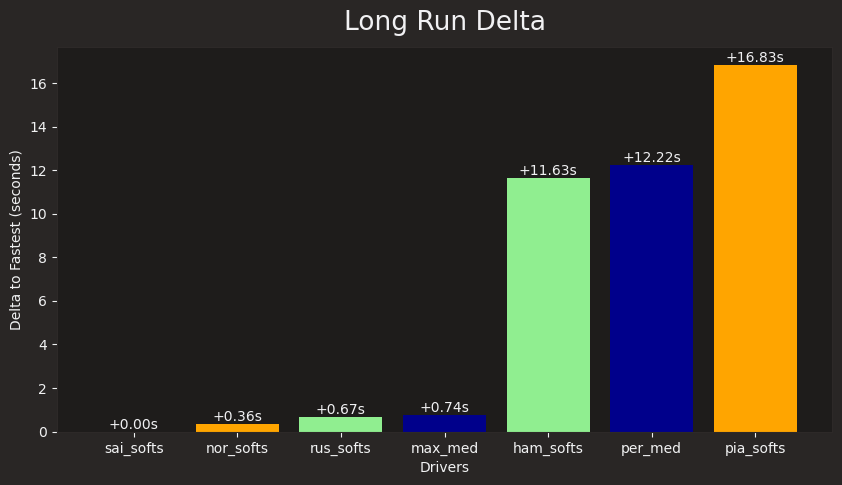

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Average lap times for each driver
lap_times = {
    'ham_softs': ham_spain_fp2_longrun_avg,
    'rus_softs': rus_spain_fp2_longrun_avg,
    'max_med': ver_spain_fp2_longrun_avg,
    'per_med': per_spain_fp2_longrun_avg,
    'nor_softs': nor_spain_fp2_softs_longrun_avg,
    'pia_softs': pia_spain_fp2_longrun_avg,
    'lec_softs': lec_spain_fp2_longrun_avg,
    'sai_softs': sai_spain_fp2_longrun_avg
}
times = [ham_spain_fp2_longrun_avg, rus_spain_fp2_longrun_avg, ver_spain_fp2_longrun_avg, per_spain_fp2_longrun_avg, nor_spain_fp2_softs_longrun_avg, pia_spain_fp2_longrun_avg, lec_spain_fp2_longrun_avg, sai_spain_fp2_longrun_avg]
# Sort lap times in ascending order
sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])

# Extract drivers and lap times
drivers = [driver for driver, _ in sorted_lap_times]
times = [time for _, time in sorted_lap_times]

# Calculate delta to the fastest driver
fastest_time = min(times)
deltas = [float((time-fastest_time).total_seconds()) for time in times]

# Define colors for specific drivers
colors = {
    'ham_softs': 'lightgreen',
    'rus_softs': 'lightgreen',
    'max_med': 'darkblue',
    'per_med': 'darkblue',
    'nor_softs': 'orange',
    'pia_softs': 'orange',
    'lec_softs': 'red',
    'sai_softs': 'red'
}

# Plotting the bar chart for delta to the fastest driver
plt.figure(figsize=(10, 5))
bars = plt.bar(drivers, deltas, color=[colors[driver] for driver in drivers])

# Labeling the deltas on the bars
for bar, delta in zip(bars, deltas):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'+{delta:.2f}s', ha='center', va='bottom')

plt.xlabel('Drivers')
plt.ylabel('Delta to Fastest (seconds)')
plt.title('Long Run Delta')
plt.show()

In [77]:
# Assuming the average lap times are already calculated and assigned to the variables
print(f"Hamilton Spain FP1 Softs Long Run Average: {ham_spain_fp2_longrun_avg}")
print(f"Russell Spain FP1 Softs Long Run Average: {rus_spain_fp2_longrun_avg}")
print(f"Verstappen Spain FP1 Mediums Long Run Average: {ver_spain_fp2_longrun_avg}")
print(f"Perez Spain FP1 Mediums Long Run Average: {per_spain_fp2_longrun_avg}")
print(f"Norris Spain FP1 Mediums Long Run Average: {nor_spain_fp2_medium_longrun_avg}")
print(f"Norris Spain FP1 Softs Long Run Average: {nor_spain_fp2_softs_longrun_avg}")
print(f"Piastri Spain FP1 Softs Long Run Average: {pia_spain_fp2_longrun_avg}")
print(f"Leclerc Spain FP1 Softs Long Run Average: {lec_spain_fp2_longrun_avg}")
print(f"Sainz Spain FP1 Mediums Long Run Average: {sai_spain_fp2_longrun_avg}")

Hamilton Spain FP1 Softs Long Run Average: 0 days 00:01:31.900545454
Russell Spain FP1 Softs Long Run Average: 0 days 00:01:20.948250
Verstappen Spain FP1 Mediums Long Run Average: 0 days 00:01:21.017909090
Perez Spain FP1 Mediums Long Run Average: 0 days 00:01:32.497333333
Norris Spain FP1 Mediums Long Run Average: 0 days 00:01:34.339800
Norris Spain FP1 Softs Long Run Average: 0 days 00:01:20.632923076
Piastri Spain FP1 Softs Long Run Average: 0 days 00:01:37.107600
Leclerc Spain FP1 Softs Long Run Average: NaT
Sainz Spain FP1 Mediums Long Run Average: 0 days 00:01:20.274666666


### Top Speeds FP1 and FP2

core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/10/results.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	P

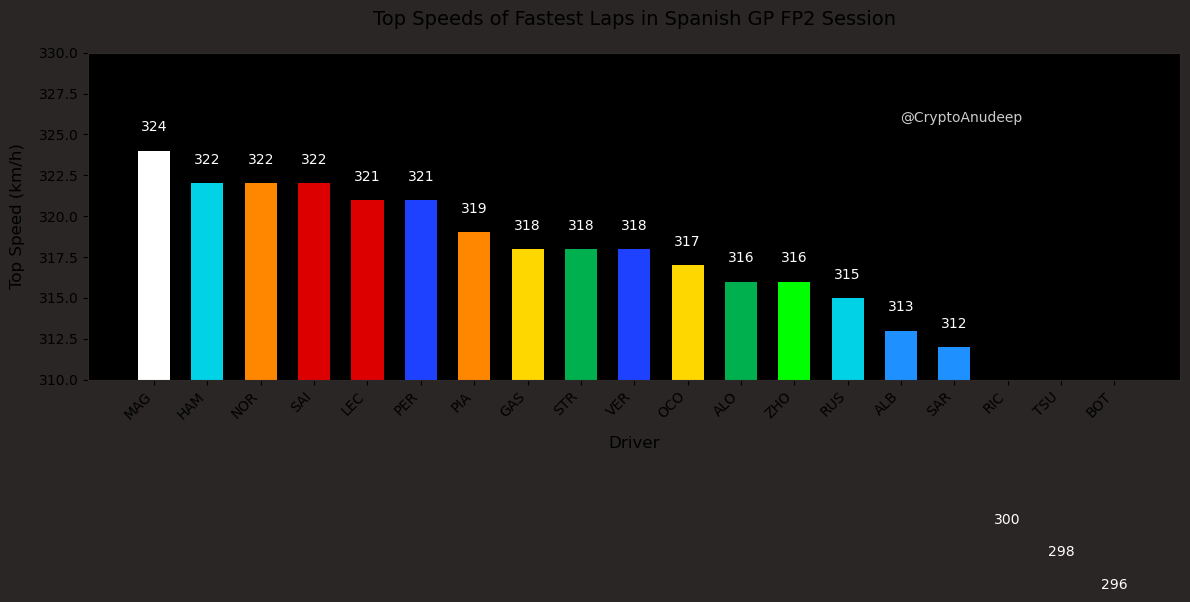

In [78]:
import fastf1 as ff1
import matplotlib.pyplot as plt

# Load the session data
session = ff1.get_session(2024, 'Spanish Grand Prix', 'FP1')
session.load()

# List of drivers and their specified colors
driver_colors = {
    'ALB': '#1E90FF',   # Blue
    'ALO': '#00AF4D',   # Green
    'BOT': 'lime',      # Adjusted to a neon green color
    'GAS': '#FFD700',   # Pink
    'HAM': '#01d2e5',
    'HUL': '#FFFFFF',   # White
    'LEC': '#DC0000',
    'MAG': '#FFFFFF',   # White
    'NOR': '#FF8700',
    'OCO': '#FFD700',
    'PER': '#1E41FF',
    'PIA': '#FF8700',
    'RIC': '#FF69B4',   # Pink
    'RUS': '#01d2e5',
    'SAI': '#DC0000',
    'SAR': '#1E90FF',   # Blue
    'STR': '#00AF4D',   # Green
    'TSU': '#FF69B4',   # Pink
    'VER': '#1E41FF',
    'ZHO': 'lime',      # Adjusted to a neon green color
}

# Dictionary to hold top speeds
top_speeds = {}

# Extract and store top speeds for each driver
for driver, color in driver_colors.items():
    laps = session.laps.pick_driver(driver)
    if not laps.empty:
        fastest_lap = laps.pick_fastest()
        telemetry = fastest_lap.get_car_data().add_distance()
        top_speed = telemetry['Speed'].max()
        top_speeds[driver] = top_speed

# Sort the dictionary by top speed in descending order
sorted_top_speeds = dict(sorted(top_speeds.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart with black background
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_top_speeds.keys(), sorted_top_speeds.values(), color=[driver_colors[driver] for driver in sorted_top_speeds.keys()], width=0.6)
plt.xlabel('Driver', fontsize=12, color='black', labelpad=10)  # Set x-axis label color to white
plt.ylabel('Top Speed (km/h)', fontsize=12, color='black', labelpad=10)  # Set y-axis label color to white
plt.title('Top Speeds of Fastest Laps in Spanish GP FP2 Session', fontsize=14, color='black', pad=20)  # Set title color to white
plt.gca().set_facecolor('black')  # Set background color to black

# Add speed values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Rotate and align x-axis labels, set color to white
plt.yticks(fontsize=10, color='black')  # Set font size for y-axis labels, set color to white
plt.tick_params(axis='x', colors='black', which='both')  # Set x-axis tick color to white
plt.tick_params(axis='y', colors='black', which='both')  # Set y-axis tick color to white
plt.ylim(310, 330)  # Set the y-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Watermark
plt.text(0.8, 0.8, '@CryptoAnudeep', color='white', alpha=0.8, fontsize=10, va='center', ha='center', transform=plt.gca().transAxes)

plt.show()


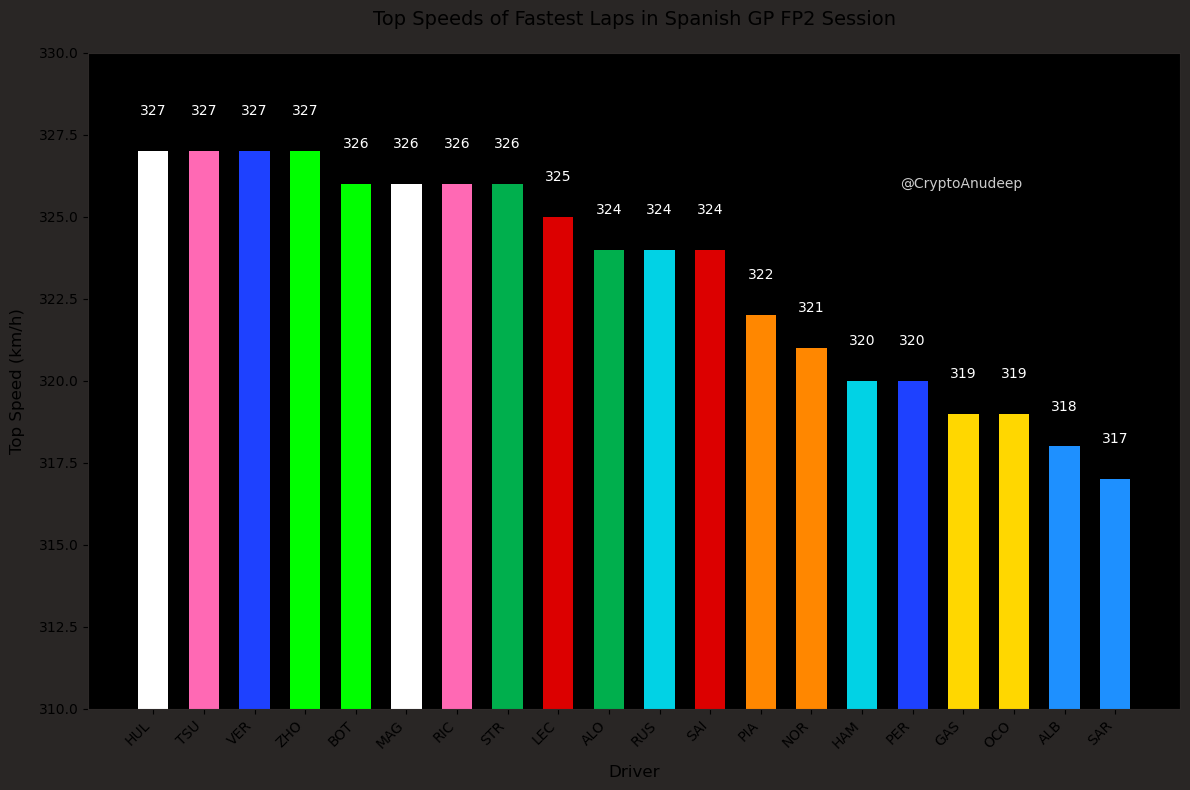

In [80]:
# List of drivers and their specified colors
driver_colors = {
    'ALB': '#1E90FF',   # Blue
    'ALO': '#00AF4D',   # Green
    'BOT': 'lime',      # Adjusted to a neon green color
    'GAS': '#FFD700',   # Pink
    'HAM': '#01d2e5',
    'HUL': '#FFFFFF',   # White
    'LEC': '#DC0000',
    'MAG': '#FFFFFF',   # White
    'NOR': '#FF8700',
    'OCO': '#FFD700',
    'PER': '#1E41FF',
    'PIA': '#FF8700',
    'RIC': '#FF69B4',   # Pink
    'RUS': '#01d2e5',
    'SAI': '#DC0000',
    'SAR': '#1E90FF',   # Blue
    'STR': '#00AF4D',   # Green
    'TSU': '#FF69B4',   # Pink
    'VER': '#1E41FF',
    'ZHO': 'lime',      # Adjusted to a neon green color
}

# Dictionary to hold top speeds
top_speeds = {}

# Extract and store top speeds for each driver
for driver, color in driver_colors.items():
    laps = session.laps.pick_driver(driver)
    if not laps.empty:
        fastest_lap = laps.pick_fastest()
        telemetry = fastest_lap.get_car_data().add_distance()
        top_speed = telemetry['Speed'].max()
        top_speeds[driver] = top_speed

# Sort the dictionary by top speed in descending order
sorted_top_speeds = dict(sorted(top_speeds.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart with black background
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_top_speeds.keys(), sorted_top_speeds.values(), color=[driver_colors[driver] for driver in sorted_top_speeds.keys()], width=0.6)
plt.xlabel('Driver', fontsize=12, color='black', labelpad=10)  # Set x-axis label color to white
plt.ylabel('Top Speed (km/h)', fontsize=12, color='black', labelpad=10)  # Set y-axis label color to white
plt.title('Top Speeds of Fastest Laps in Spanish GP FP2 Session', fontsize=14, color='black', pad=20)  # Set title color to white
plt.gca().set_facecolor('black')  # Set background color to black

# Add speed values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Rotate and align x-axis labels, set color to white
plt.yticks(fontsize=10, color='black')  # Set font size for y-axis labels, set color to white
plt.tick_params(axis='x', colors='black', which='both')  # Set x-axis tick color to white
plt.tick_params(axis='y', colors='black', which='both')  # Set y-axis tick color to white
plt.ylim(310, 330)  # Set the y-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Watermark
plt.text(0.8, 0.8, '@CryptoAnudeep', color='white', alpha=0.8, fontsize=10, va='center', ha='center', transform=plt.gca().transAxes)

plt.show()


### Quali Pace Analysis

In [81]:
import fastf1
import pandas as pd

spain_q_session = fastf1.get_session(2024, 'Spain', 'Q')
spain_q_session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/10/qualifying.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            

In [82]:
ham_q_spain_laps = spain_q_session.laps.pick_driver('HAM')
rus_q_spain_laps = spain_q_session.laps.pick_driver('RUS')
max_q_spain_laps = spain_q_session.laps.pick_driver('VER')
nor_q_spain_laps = spain_q_session.laps.pick_driver('NOR')
pia_q_spain_laps = spain_q_session.laps.pick_driver('PIA')
lec_q_spain_laps = spain_q_session.laps.pick_driver('LEC')
sai_q_spain_laps = spain_q_session.laps.pick_driver('SAI')

#Converting into DataFrame
ham_spain_q_df = pd.DataFrame(ham_q_spain_laps)
rus_spain_q_df = pd.DataFrame(rus_q_spain_laps)
max_spain_q_df = pd.DataFrame(max_q_spain_laps)
nor_spain_q_df = pd.DataFrame(nor_q_spain_laps)
pia_spain_q_df = pd.DataFrame(pia_q_spain_laps)
lec_spain_q_df = pd.DataFrame(lec_q_spain_laps)
sai_spain_q_df = pd.DataFrame(sai_q_spain_laps)


# Final Q3 laps
ham_spain_q3_time = ham_spain_q_df['LapTime'].min()
rus_spain_q3_time = rus_spain_q_df['LapTime'].min()
max_spain_q3_time = max_spain_q_df['LapTime'].min()
nor_spain_q3_time = nor_spain_q_df['LapTime'].min()
pia_spain_q3_time = pia_spain_q_df['LapTime'].min()
lec_spain_q3_time = lec_spain_q_df['LapTime'].min()
sai_spain_q3_time = sai_spain_q_df['LapTime'].min()

#Ideal Lap Times
ham_spain_best_possible_time = ham_spain_q_df['Sector1Time'].min() + ham_spain_q_df['Sector2Time'].min() + ham_spain_q_df['Sector3Time'].min()
rus_spain_best_possible_time = rus_spain_q_df['Sector1Time'].min() + rus_spain_q_df['Sector2Time'].min() + rus_spain_q_df['Sector3Time'].min()
max_spain_best_possible_time = max_spain_q_df['Sector1Time'].min() + max_spain_q_df['Sector2Time'].min() + max_spain_q_df['Sector3Time'].min()
nor_spain_best_possible_time = nor_spain_q_df['Sector1Time'].min() + nor_spain_q_df['Sector2Time'].min() + nor_spain_q_df['Sector3Time'].min()
pia_spain_best_possible_time = pia_spain_q_df['Sector1Time'].min() + pia_spain_q_df['Sector2Time'].min() + pia_spain_q_df['Sector3Time'].min()
lec_spain_best_possible_time = lec_spain_q_df['Sector1Time'].min() + lec_spain_q_df['Sector2Time'].min() + lec_spain_q_df['Sector3Time'].min()
sai_spain_best_possible_time = sai_spain_q_df['Sector1Time'].min() + sai_spain_q_df['Sector2Time'].min() + sai_spain_q_df['Sector3Time'].min()


#Printing
print(f"ham q3 time: {ham_spain_q3_time} vs best possible time: {ham_spain_best_possible_time}; delta: {ham_spain_best_possible_time-ham_spain_q3_time}")
print(f"rus q3 time: {rus_spain_q3_time} vs best possible time: {rus_spain_best_possible_time}; delta: {rus_spain_best_possible_time-rus_spain_q3_time}")
print(f"max q3 time: {max_spain_q3_time} vs best possible time: {max_spain_best_possible_time}; delta: {max_spain_best_possible_time-max_spain_q3_time}")
print(f"nor q3 time: {nor_spain_q3_time} vs best possible time: {nor_spain_best_possible_time}; delta: {nor_spain_best_possible_time-nor_spain_q3_time}")
print(f"pia q3 time: {pia_spain_q3_time} vs best possible time: {pia_spain_best_possible_time}; delta: {pia_spain_best_possible_time-pia_spain_q3_time}")
print(f"lec q3 time: {lec_spain_q3_time} vs best possible time: {lec_spain_best_possible_time}; delta: {lec_spain_best_possible_time-nor_spain_q3_time}")
print(f"sai q3 time: {sai_spain_q3_time} vs best possible time: {sai_spain_best_possible_time}; delta: {sai_spain_best_possible_time-pia_spain_q3_time}")

ham q3 time: 0 days 00:01:11.701000 vs best possible time: 0 days 00:01:11.658000; delta: -1 days +23:59:59.957000
rus q3 time: 0 days 00:01:11.703000 vs best possible time: 0 days 00:01:11.623000; delta: -1 days +23:59:59.920000
max q3 time: 0 days 00:01:11.403000 vs best possible time: 0 days 00:01:11.403000; delta: 0 days 00:00:00
nor q3 time: 0 days 00:01:11.383000 vs best possible time: 0 days 00:01:11.383000; delta: 0 days 00:00:00
pia q3 time: 0 days 00:01:12.011000 vs best possible time: 0 days 00:01:11.947000; delta: -1 days +23:59:59.936000
lec q3 time: 0 days 00:01:11.731000 vs best possible time: 0 days 00:01:11.731000; delta: 0 days 00:00:00.348000
sai q3 time: 0 days 00:01:11.736000 vs best possible time: 0 days 00:01:11.648000; delta: -1 days +23:59:59.637000


core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "C:\Users\koner\anaconda3\Lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/10/qualifying.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           I

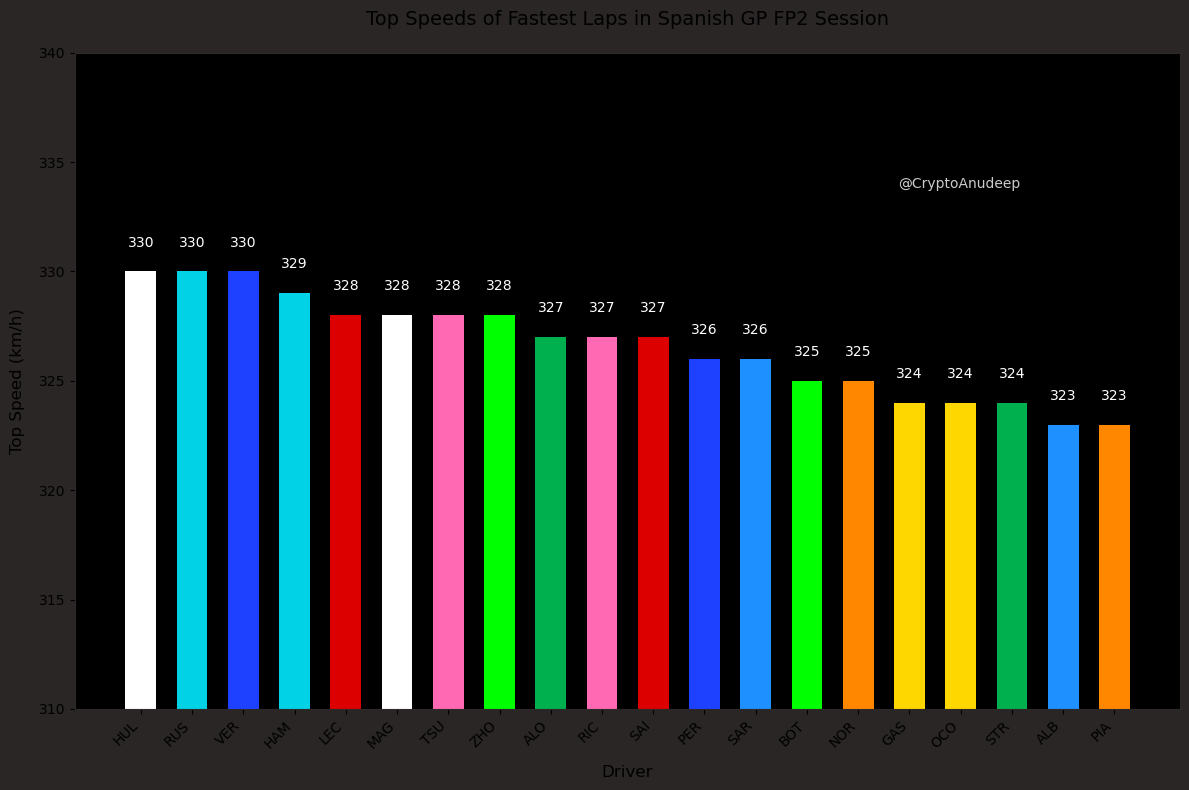

In [83]:
import fastf1 as ff1
import matplotlib.pyplot as plt

# Load the session data
session = ff1.get_session(2024, 'Spanish Grand Prix', 'Q')
session.load()

# List of drivers and their specified colors
driver_colors = {
    'ALB': '#1E90FF',   # Blue
    'ALO': '#00AF4D',   # Green
    'BOT': 'lime',      # Adjusted to a neon green color
    'GAS': '#FFD700',   # Pink
    'HAM': '#01d2e5',
    'HUL': '#FFFFFF',   # White
    'LEC': '#DC0000',
    'MAG': '#FFFFFF',   # White
    'NOR': '#FF8700',
    'OCO': '#FFD700',
    'PER': '#1E41FF',
    'PIA': '#FF8700',
    'RIC': '#FF69B4',   # Pink
    'RUS': '#01d2e5',
    'SAI': '#DC0000',
    'SAR': '#1E90FF',   # Blue
    'STR': '#00AF4D',   # Green
    'TSU': '#FF69B4',   # Pink
    'VER': '#1E41FF',
    'ZHO': 'lime',      # Adjusted to a neon green color
}

# Dictionary to hold top speeds
top_speeds = {}

# Extract and store top speeds for each driver
for driver, color in driver_colors.items():
    laps = session.laps.pick_driver(driver)
    if not laps.empty:
        fastest_lap = laps.pick_fastest()
        telemetry = fastest_lap.get_car_data().add_distance()
        top_speed = telemetry['Speed'].max()
        top_speeds[driver] = top_speed

# Sort the dictionary by top speed in descending order
sorted_top_speeds = dict(sorted(top_speeds.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart with black background
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_top_speeds.keys(), sorted_top_speeds.values(), color=[driver_colors[driver] for driver in sorted_top_speeds.keys()], width=0.6)
plt.xlabel('Driver', fontsize=12, color='black', labelpad=10)  # Set x-axis label color to white
plt.ylabel('Top Speed (km/h)', fontsize=12, color='black', labelpad=10)  # Set y-axis label color to white
plt.title('Top Speeds of Fastest Laps in Spanish GP FP2 Session', fontsize=14, color='black', pad=20)  # Set title color to white
plt.gca().set_facecolor('black')  # Set background color to black

# Add speed values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Rotate and align x-axis labels, set color to white
plt.yticks(fontsize=10, color='black')  # Set font size for y-axis labels, set color to white
plt.tick_params(axis='x', colors='black', which='both')  # Set x-axis tick color to white
plt.tick_params(axis='y', colors='black', which='both')  # Set y-axis tick color to white
plt.ylim(310, 340)  # Set the y-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Watermark
plt.text(0.8, 0.8, '@CryptoAnudeep', color='white', alpha=0.8, fontsize=10, va='center', ha='center', transform=plt.gca().transAxes)

plt.show()